<a href="https://colab.research.google.com/github/Nohyunjin/DeepLearning/blob/main/OpenCV%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%95%BD_%EB%AA%A8%EC%96%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

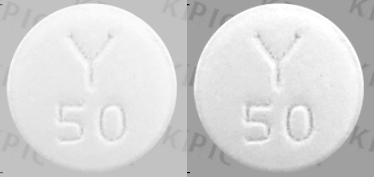

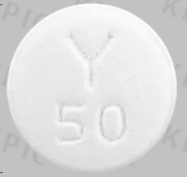

dict_items([('m00', 32728.0), ('m10', 3044439.333333333), ('m01', 2879896.0), ('m20', 377511538.6666666), ('m11', 267910325.3333333), ('m02', 337862141.6666666), ('m30', 52662861479.8), ('m21', 33221014702.666668), ('m12', 31434753011.1), ('m03', 44591891568.0), ('mu20', 94310278.1451832), ('mu11', 15291.774627238512), ('mu02', 84446076.8042858), ('mu30', -143217.99982452393), ('mu21', -907807.7306022644), ('mu12', 3291547.66189003), ('mu03', 114864.68853759766), ('nu20', 0.08804812108606969), ('nu11', 1.4276408154870352e-05), ('nu02', 0.07883889796466523), ('nu30', -7.390927426949019e-07), ('nu21', -4.684844825877616e-06), ('nu12', 1.698640528507591e-05), ('nu03', 5.927722618250923e-07)])
32728.0
731.6568541526794
0.7682709991786845


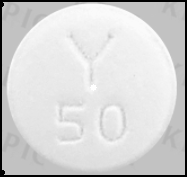

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/1.PNG', cv2.IMREAD_GRAYSCALE)

height, width = img.shape
for y in range(height):
    for x in range(width):
        if img[y,x] > 250:
            img[y,x] = 250

img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(np.c_[img, img2])

cv2_imshow(img)


ret, bin_img = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(bin_img,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)

for cont in contours:
    M = cv2.moments(cont)
    area = cv2.contourArea(cont)
    length = cv2.arcLength(cont, True)
    ratio = 4 * np.pi * area / (length * length)

    print(M.items())
    print(area)
    print(length)
    print(ratio)

    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    cv2.circle(img, (center_x, center_y), 3, (255, 0, 0), -1)
    cv2.drawContours(img, [cont], 0 , (0, 0, 255), 2)

cv2_imshow(img)

In [2]:
import numpy as np

def contrast(img, low = 0, high = 255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low))
            if (temp > 255):
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else :
                img_[y][x] = temp
    return img_

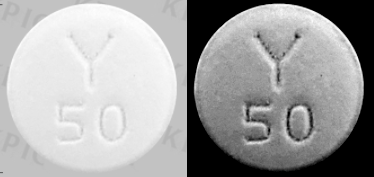

True

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/데이터 사이언스 + R/data/약사진/1.PNG', cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 200, 255)
cv2_imshow(np.c_[img, img2])
cv2.imwrite('trans1.png', np.c_[img, img2])

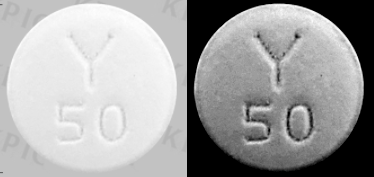

In [6]:
img = cv2.imread('/content/trans1.png', 0)
cv2_imshow(img)

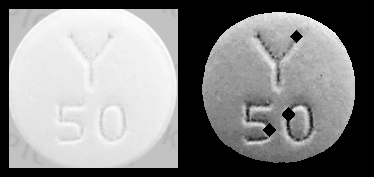

In [9]:
contours, hierachy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

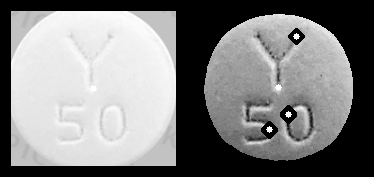

In [10]:
contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cont in contours:
    M = cv2.moments(cont)

    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    cv2.circle(img, (center_x, center_y), 3, (255, 0, 0), -1)
    cv2.drawContours(img, [cont], 0, (0,0,255), 2)

cv2_imshow(img)